In [30]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [31]:
# Read in the CMPD data
crimeDF = pd.read_csv('CMPD_Incidents.csv', low_memory=False)
crimeDF.head()

,YEAR,INCIDENT_REPORT_ID,LOCATION,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,LATITUDE_PUBLIC,LONGITUDE_PUBLIC,CMPD_PATROL_DIVISION,NPA,...,DATE_INCIDENT_END,ADDRESS_DESCRIPTION,LOCATION_TYPE_DESCRIPTION,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION
0,2023,20231022-2159-03,11000 NORTHLAKE LANDING DR,28216,1446960.0,592756.0,35.364506,-80.855140,North,72,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Private Residence,Open,Open,NaN,90Z,All Other Offenses
1,2023,20231022-2151-00,5800 MONROE RD,28212,1472824.0,527355.0,35.186132,-80.764500,Independence,52,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Hotel/Motel,Open,Open,NaN,23H,All Other Thefts
2,2023,20231022-2131-00,2400 N TRYON ST,28206,1456970.0,549523.0,35.246247,-80.818913,Metro,157,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Other - Commercial Place,Open,Open,NaN,23H,All Other Thefts
3,2023,20231022-2006-03,4400 SHARON RD,28211,1453419.0,514991.0,35.151200,-80.828674,Providence,358,...,2023/10/22 00:00:00+00,Location of occurrence,Parking Lot,Retail,Shopping Mall,Open,Open,NaN,23G,Theft of Motor Vehicle Parts from Vehicle
4,2023,20231022-1958-01,4600 WATERFORD KNOLL DR,NaN,1446684.0,493480.0,35.091762,-80.849861,South,303,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Apartment/Duplex Private Res,Open,Open,NaN,802,Sudden/Natural Death Investigation


In [3]:
# Unique IDs from the 'INCIDENT_REPORT_ID' column
unique_incident_report_ids = crimeDF['INCIDENT_REPORT_ID'].unique()
len(unique_incident_report_ids)

624990

In [4]:
addressDescription = crimeDF['ADDRESS_DESCRIPTION'].unique()
len(addressDescription)

3

In [5]:
placeTypeDescription = crimeDF['PLACE_TYPE_DESCRIPTION'].unique()
print(placeTypeDescription)

['Residential' 'Commercial Place' 'Retail' 'Open Area'
 'Public/Non-Residential']


In [6]:
locationTypeDescription = crimeDF['LOCATION_TYPE_DESCRIPTION'].unique()
print(locationTypeDescription)

['Indoors' 'Parking Lot' 'Outdoors' 'Other' 'Parking Deck' nan]


In [7]:
highestNIBRSDescription = crimeDF['HIGHEST_NIBRS_DESCRIPTION'].unique()
print(highestNIBRSDescription)

['All Other Offenses' 'All Other Thefts'
 'Theft of Motor Vehicle Parts from Vehicle'
 'Sudden/Natural Death Investigation' 'Theft From Motor Vehicle'
 'Shoplifting' 'Suicide' 'Other Unlisted Non-Criminal' 'Affray'
 'Missing Person' 'Simple Assault' 'Motor Vehicle Theft' 'Intimidation'
 'Damage/Vandalism Of Property' 'Burglary/B&E' 'Aggravated Assault'
 'Robbery' 'Drug/Narcotic Violations' 'Trespass Of Real Property'
 'Credit Card/Teller Fraud' 'Impersonation' 'Forcible Fondling'
 'Identity Theft' 'Public Accident' 'Disorderly Conduct'
 'Weapon Law Violations' 'Overdose' 'Theft From Building'
 'Extortion/Blackmail' 'Driving Under The Influence'
 'Hacking/Computer Invasion' 'False Pretenses/Swindle'
 'Counterfeiting/Forgery' 'Pocket-Picking' 'Stolen Property Offenses'
 'Forcible Rape' 'Indecent Exposure' 'Vehicle Recovery' 'Kidnapping'
 'Drug Equipment Violations' 'Embezzlement' 'Arson'
 'Pornography/Obscene Material' 'Fire (Accidental/Non-Arson)' 'Murder'
 'Family Offenses; Nonviolent'

In [54]:
#
CmdpPatrolDivision = crimeDF.groupby(['CMPD_PATROL_DIVISION'])['INCIDENT_REPORT_ID'].count()
# drop columns for Davidson and Huntersville
CmdpPatrolDivision = CmdpPatrolDivision.drop(["Davidson", "Huntersville","Unknown"])

CmdpPatrolDivision

CMPD_PATROL_DIVISION
Airport             9085
Central            42556
Eastway            38897
Freedom            44791
Hickory Grove      39983
Independence       38036
Metro              48413
North              57539
North Tryon        47192
Providence         37969
South              35717
Steele Creek       66271
University City    69217
Westover           47961
Name: INCIDENT_REPORT_ID, dtype: int64

In [10]:

precinctCount = crimeDF.groupby(['LOCATION_TYPE_DESCRIPTION', 'YEAR'])['INCIDENT_REPORT_ID'].count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(precinctCount)

LOCATION_TYPE_DESCRIPTION  YEAR
Indoors                    2017    41771
                           2018    41553
                           2019    43353
                           2020    38723
                           2021    38598
                           2022    41399
                           2023    32791
Other                      2017     2046
                           2018     2181
                           2019     2316
                           2020     2633
                           2021     2890
                           2022     2937
                           2023     2905
Outdoors                   2017    35416
                           2018    34183
                           2019    35509
                           2020    32269
                           2021    31620
                           2022    32328
                           2023    25612
Parking Deck               2017     1019
                           2018     1081
                         

In [1]:
#Dante Dillahunt
#Data Frame with loction of incidents by years

#precinctTypeCount = crimeDF.groupby(['LOCATION_TYPE_DESCRIPTION','YEAR'])['INCIDENT_REPORT_ID'].count()

#precinctTypeCount

In [12]:
precinctTypeCount = crimeDF.groupby(['LOCATION_TYPE_DESCRIPTION','YEAR'])['INCIDENT_REPORT_ID'].count()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(precinctTypeCount)

LOCATION_TYPE_DESCRIPTION  YEAR
Indoors                    2017    41771
                           2018    41553
                           2019    43353
                           2020    38723
                           2021    38598
                           2022    41399
                           2023    32791
Other                      2017     2046
                           2018     2181
                           2019     2316
                           2020     2633
                           2021     2890
                           2022     2937
                           2023     2905
Outdoors                   2017    35416
                           2018    34183
                           2019    35509
                           2020    32269
                           2021    31620
                           2022    32328
                           2023    25612
Parking Deck               2017     1019
                           2018     1081
                         

In [13]:

# group the data by CMPD patrol division and YearMonth, then count the number of incidents
crimesPerYear = crimeDF.groupby(['LOCATION_TYPE_DESCRIPTION','YEAR']).size().reset_index(name='Crime Count')

# pivot the table to create columns for each patrol division and fill missing values with 0
crimeTable = crimesPerYear.pivot(index='YEAR', columns='LOCATION_TYPE_DESCRIPTION', values='Crime Count').fillna(0)

# You can also reset the index to make YearMonth a regular column if needed
# crime_pivot.reset_index(inplace=True)

# Display the resulting table
#crimeTable.drop(columns=columns_to_remove, inplace=True)
pd.set_option('display.max_rows', 70)
crimeTable

LOCATION_TYPE_DESCRIPTION,Indoors,Other,Outdoors,Parking Deck,Parking Lot
YEAR,,,,,
2017,41771,2046,35416,1019,13197
2018,41553,2181,34183,1081,12410
2019,43353,2316,35509,1168,13217
2020,38723,2633,32269,1193,12372
2021,38598,2890,31620,1347,13758
2022,41399,2937,32328,1699,14156
2023,32791,2905,25612,1549,13797


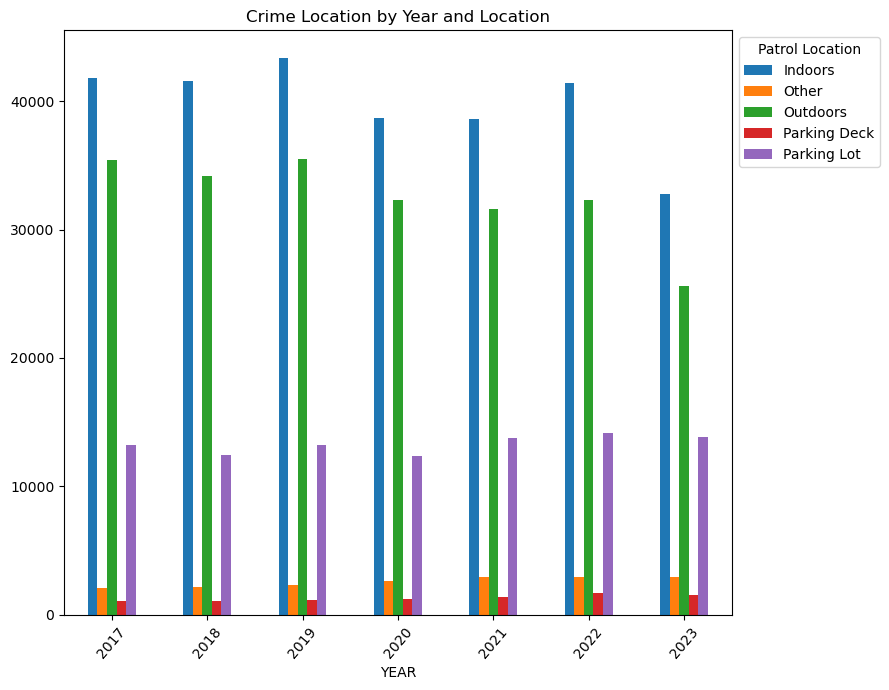

In [66]:
figs = precinctTypeCount.unstack(level=0).plot(kind='bar', rot=50, figsize=(9, 7), title =f'Crime Location by Year and Location', legend=False)
plt.legend(title='Patrol Location', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

#Dante Dillahunt
#Data Frame with loction of incidents by years

precinctTypeCount = crimeDF.groupby(['LOCATION_TYPE_DESCRIPTION','YEAR'])['INCIDENT_REPORT_ID'].count()
df =pd.DataFrame(precinctTypeCount)

#precinctTypeCount
precinctTypeCount.median()